In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def plot_img(img):
    plt.figure(figsize=(10,7))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

In [3]:
part1_single_objects = "../COTSDataset/Part 1 - Single Objects"
part2_multiple_objects = "../COTSDataset/Part 2 - Multiple Objects"
part3_complex_background = "../COTSDataset/Part 3 - Complex Background"

In [4]:
img_path = os.path.join(part2_multiple_objects, "academic_book_no", "3_colour.jpeg")
# img_path = os.path.join(part2_multiple_objects, "statues_no", "1_colour.jpeg")
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask_path = os.path.join(part2_multiple_objects, "academic_book_no", "masks")
# Retrieve all the masks
masks = []
for mask_file in os.listdir(mask_path):
    mask = cv2.imread(os.path.join(mask_path, mask_file))
    masks.append(mask)
# mask_path = os.path.join(part2_multiple_objects, "statues_no", "masks", "statues_no_3_colour_mask_1_mask.png")
# mask = cv2.imread(mask_path)

In [5]:
def extract_bbox(mask):
    # Extracting target bounding box from mask
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    mask = mask.astype(np.uint8)
    # Find contours in the mask
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize an empty list to store bounding boxes
    bounding_boxes = []

    # Loop through the detected contours
    for cnt in contours:
        # Get the bounding box for each contour
        x, y, w, h = cv2.boundingRect(cnt)
        
        # Add the bounding box coordinates to the list
        bounding_boxes.append((x, y, x + w, y + h))

    # Find the minimum and maximum coordinates to create a bounding box around all masks
    x1, y1 = min(box[0] for box in bounding_boxes), min(box[1] for box in bounding_boxes)
    x2, y2 = max(box[2] for box in bounding_boxes), max(box[3] for box in bounding_boxes)

    # Create the target bounding box that encompasses all masks
    return np.array([x1, y1, x2, y2])

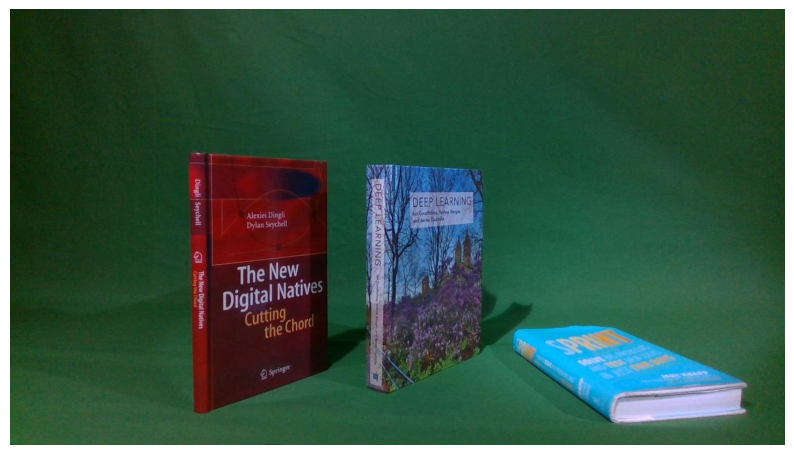

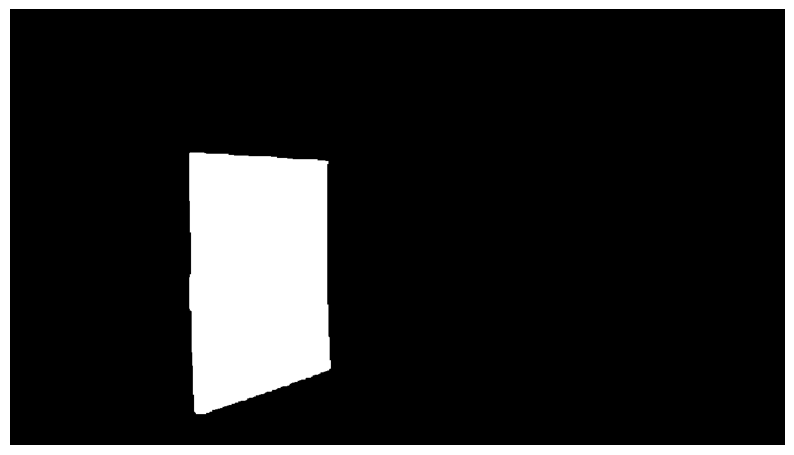

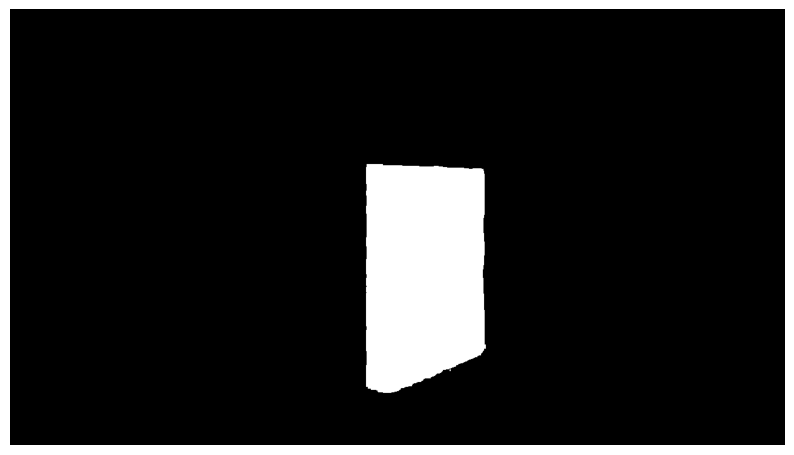

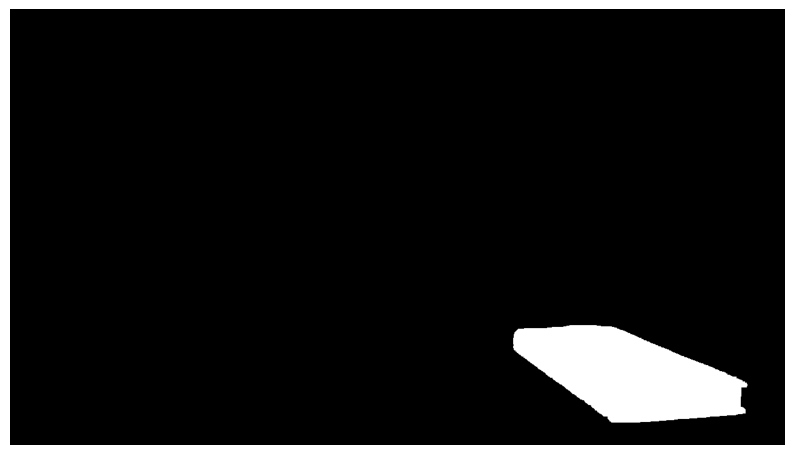

In [6]:
plot_img(img)

gt_bboxes = []

for mask in masks:
    gt_bboxes.append(extract_bbox(mask))
    plot_img(mask)

In [7]:
from utils import *
from models import *
from env import *
from init import *
from agent import DQNAgent, DoubleDQNAgent, DuelingDQNAgent, DoubleDuelingDQNAgent, NoisyDQNAgent, DoubleNoisyDQNAgent

CUDA is available! Using GPU for computations.


In [8]:
# env_config = {'image': img, 'original_image': img, 'target_gt_boxes': gt_bboxes, 'render_mode': "trigger_image"}
# env = gym.make('DetectionEnv-v0', env_config=env_config)
# _ = env.reset()

env_config = {'dataset': 'PascalVOC2007_2012Dataset', 'dataset_image_set': 'train', 'year': '2007+2012'} #, 'render_mode': "trigger_image"}
env = gym.make('DetectionEnv-v0', env_config=env_config)

Using downloaded and verified file: PascalVOC2007_2012Dataset\VOCtrainval_06-Nov-2007.tar
Extracting PascalVOC2007_2012Dataset\VOCtrainval_06-Nov-2007.tar to PascalVOC2007_2012Dataset
Using downloaded and verified file: PascalVOC2007_2012Dataset\VOCtrainval_11-May-2012.tar
Extracting PascalVOC2007_2012Dataset\VOCtrainval_11-May-2012.tar to PascalVOC2007_2012Dataset
Dataset loaded successfully.
Total number of classes in the dataset: 20
Total number of images in the dataset: 12880
Current Class: cat


In [9]:
# _ = env.render()

In [10]:
# env.close()

In [11]:
# Creating the environment
# env = DetectionEnv(img, img, target_bbox) #, feature_extractor=ResNet50FeatureExtractor(), target_size=RESNET50_TARGET_SIZE)
# env = gym.make('DetectionEnv-v0', image = img, original_image = img, target_bbox = target_bbox, feature_extractor=ResNet50FeatureExtractor(), target_size=RESNET50_TARGET_SIZE)
# _ = env.reset()

In [12]:
# env = DetectionEnv(img, img, target_bbox, feature_extractor=MobileNetV2FeatureExtractor(), target_size=MOBILENETV2_TARGET_SIZE)
# env = gym.make('DetectionEnv-v0', image = img, original_image = img, target_bbox = target_bbox, feature_extractor=MobileNetV2FeatureExtractor(), target_size=MOBILENETV2_TARGET_SIZE)
# _ = env.reset()

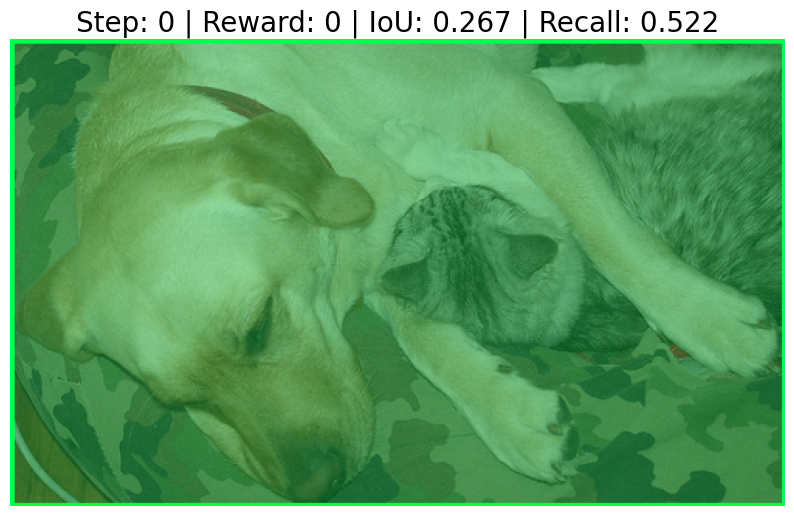

In [13]:
frame = env.display(do_display=True)

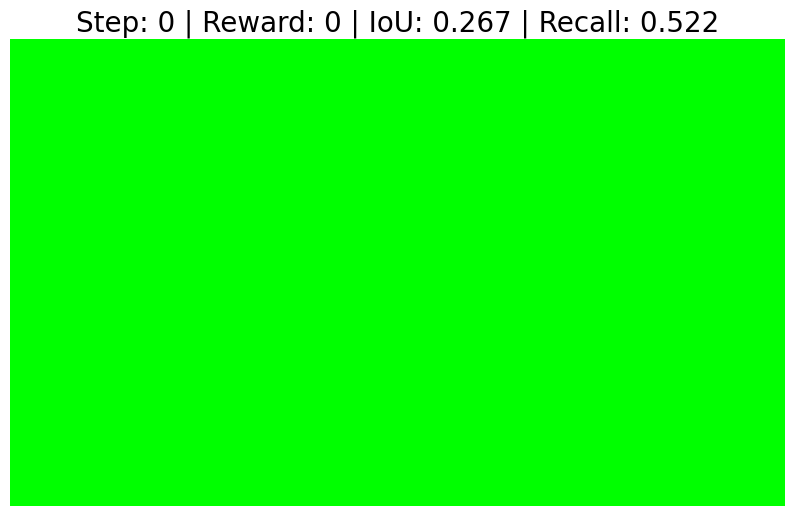

In [14]:
frame = env.display(do_display=True, mode='bbox')

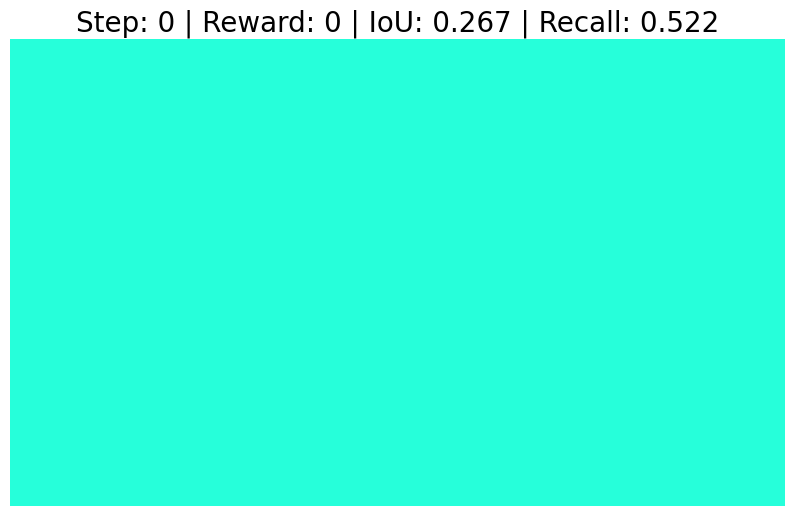

In [15]:
frame = env.display(do_display=True, mode='heatmap')

In [16]:
env.get_actions()

Actions:
0: Move right → 
1: Move left ←
2: Move up ↑
3: Move down ↓
4: Make bigger +
5: Make smaller -
6: Make fatter W
7: Make taller H
8: Trigger T


In [17]:
observation_space, info = env.reset()
print(observation_space)

[[0. 0. 1. ... 0. 0. 0.]]


In [18]:
env.observation_space

Box(0.0, 10.0, (25182,), float32)

In [19]:
# action = env.action_space.sample()

# env.decode_action(action)

# # Taking a step in the environment
# next_state, reward, terminated, truncated, info = env.step(action)
# print("Terminated: ", terminated)
# print("Truncated: ", truncated)
# print("Reward: ", reward)
# print("IoU", info['iou'])
# print("Recall", info['recall'])
# _ = env.display(do_display=True, mode='image')

In [20]:
# next_state, reward, terminated, truncated, info = env.step(8) #Trigger
# print("Terminated: ", terminated)
# print("Truncated: ", truncated)
# print("Reward: ", reward)
# print("IoU", info['iou'])
# print("Recall", info['recall'])
# _ = env.display(do_display=True, mode='trigger_image')

In [21]:
img_path2 = os.path.join(part2_multiple_objects, "academic_book_no", "2_colour.jpeg")
# img_path = os.path.join(part2_multiple_objects, "academic_book_no", "2_colour.jpeg")
img2 = cv2.imread(img_path2)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

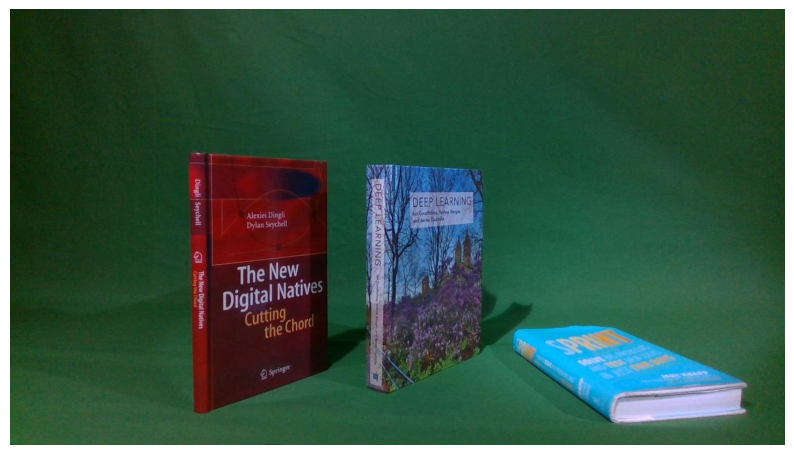

In [22]:
plot_img(img)

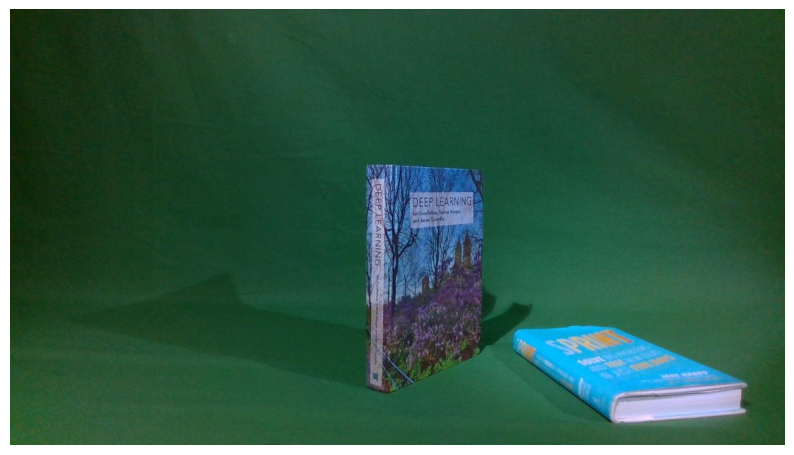

In [23]:
plot_img(img2)

In [24]:
def check(image1, image2):
    for i in range(len(image1)):
        for j in range(len(image1[0])):
            if image1[i][j] != image2[i][j]:
                print("Not equal")
                break

In [25]:
# env_config = {'image': img}
# image1, _ = env.reset(env_config=env_config)
# env_config = {'image': img2}
# image2, _ = env.reset(env_config=env_config)
# check(image1, image2)

In [26]:
# env_config = {'image': img}
# image1, _ = env.reset(env_config=env_config)
# env_config = {'image': img}
# image2, _ = env.reset(env_config=env_config)
# check(image1, image2)

#### DQN Agent

In [28]:
# Setting name
name = "Normal DQN"

# Creating the Replay_Buffer
replay_buffer = Replay_Buffer(env, BUFFER_SIZE, MIN_REPLAY_SIZE, BATCH_SIZE)

# Creating the DQN agent
dqn_agent = DQNAgent(env, replay_buffer, TARGET_UPDATE_FREQ, name=name)

# Running the agent
dqn_agent.run()

# Retrieving the episode info
dqn_episode_info = dqn_agent.get_episode_info()

# Printing the time taken to train the agent
print("Time taken to train the agent: {:.2f} seconds".format(dqn_episode_info["eps_duration"]))

# Saving the model
dqn_agent.save(path="models/" + name)

Episode: 1 Epsilon: 1.00 Average Reward: 168.62773453183473 Episode Length: 199 Average IoU: 0.28 Average Recall: 0.51
----------------------------------------------------------------------------------------------------
Episode: 2 Epsilon: 1.00 Average Reward: 220.8204801191188 Episode Length: 200 Average IoU: 0.43 Average Recall: 0.59
----------------------------------------------------------------------------------------------------
Episode: 3 Epsilon: 1.00 Average Reward: 223.90543634037877 Episode Length: 200 Average IoU: 0.44 Average Recall: 0.63
----------------------------------------------------------------------------------------------------
Episode: 4 Epsilon: 1.00 Average Reward: 229.99161628193104 Episode Length: 200 Average IoU: 0.47 Average Recall: 0.67
----------------------------------------------------------------------------------------------------
Episode: 5 Epsilon: 1.00 Average Reward: 237.6371228693885 Episode Length: 200 Average IoU: 0.49 Average Recall: 0.67
---

In [29]:
# Setting name
name = "Normal DQN"

# Creating the Replay_Buffer
replay_buffer = Replay_Buffer(env, BUFFER_SIZE, MIN_REPLAY_SIZE, BATCH_SIZE)

# Creating the DQN agent
dqn_agent = DQNAgent(env, replay_buffer, TARGET_UPDATE_FREQ, name=name)

# Running the agent
dqn_agent.load(path="models/" + name)
dqn_agent.epsilon = 0.0

#### Double DQN Agent

In [30]:
# # Setting name
# name = "Double DQN"

# # Creating the Replay_Buffer
# replay_buffer = Replay_Buffer(env, BUFFER_SIZE, MIN_REPLAY_SIZE, BATCH_SIZE)

# # Creating the Double DQN agent
# dqn_agent = DoubleDQNAgent(env, replay_buffer, TARGET_UPDATE_FREQ, name=name)

# # Running the agent
# dqn_agent.run()

# # Retrieving the episode info
# dqn_episode_info = dqn_agent.get_episode_info()

# # Printing the time taken to train the agent
# print("Time taken to train the agent: {:.2f} seconds".format(dqn_episode_info["eps_duration"]))

# # Saving the model
# dqn_agent.save(path="models/" + name)

In [31]:
# # Setting name
# name = "Double DQN"

# # Creating the Replay_Buffer
# replay_buffer = Replay_Buffer(env, BUFFER_SIZE, MIN_REPLAY_SIZE, BATCH_SIZE)

# # Creating the Double DQN agent
# dqn_agent = DoubleDQNAgent(env, replay_buffer, TARGET_UPDATE_FREQ, name=name)

# # Running the agent
# dqn_agent.load(path="models/" + name)
# dqn_agent.epsilon = 0.0

#### Dueling DQN Agent

In [32]:
# # Setting name
# name = "Dueling DQN"

# # Creating the Replay_Buffer
# replay_buffer = Replay_Buffer(env, BUFFER_SIZE, MIN_REPLAY_SIZE, BATCH_SIZE)

# # Creating the Dueling DQN agent
# dqn_agent = DuelingDQNAgent(env, replay_buffer, TARGET_UPDATE_FREQ, name=name)

# # Running the agent
# dqn_agent.run()

# # Retrieving the episode info
# dqn_episode_info = dqn_agent.get_episode_info()

# # Printing the time taken to train the agent
# print("Time taken to train the agent: {:.2f} seconds".format(dqn_episode_info["eps_duration"]))

# # Saving the model
# dqn_agent.save(path="models/" + name)

In [33]:
# # Setting name
# name = "Dueling DQN"

# # Creating the Replay_Buffer
# replay_buffer = Replay_Buffer(env, BUFFER_SIZE, MIN_REPLAY_SIZE, BATCH_SIZE)

# # Creating the Dueling DQN agent
# dqn_agent = DuelingDQNAgent(env, replay_buffer, TARGET_UPDATE_FREQ, name=name)

# # Running the agent
# dqn_agent.load(path="models/" + name)
# dqn_agent.epsilon = 0.0

#### Noisy DQN Agent

In [34]:
# # Setting the name
# name = "Noisy DQN"

# # Creating the Replay_Buffer
# replay_buffer = Replay_Buffer(env, BUFFER_SIZE, MIN_REPLAY_SIZE, BATCH_SIZE)

# # Creating the Noisy DQN agent
# dqn_agent = NoisyDQNAgent(env, replay_buffer, TARGET_UPDATE_FREQ, name=name)

# # Running the agent
# dqn_agent.run()

# # Retrieving the episode info
# dqn_episode_info = dqn_agent.get_episode_info()

# # Printing the time taken to train the agent
# print("Time taken to train the agent: {:.2f} seconds".format(dqn_episode_info["eps_duration"]))

# # Saving the model
# dqn_agent.save(path="models/" + name)

In [35]:
# # Setting name
# name = "Noisy DQN"

# # Creating the Replay_Buffer
# replay_buffer = Replay_Buffer(env, BUFFER_SIZE, MIN_REPLAY_SIZE, BATCH_SIZE)

# # Creating the Noisy DQN agent
# dqn_agent = NoisyDQNAgent(env, replay_buffer, TARGET_UPDATE_FREQ, name=name)

# # Running the agent
# dqn_agent.load(path="models/" + name)
# dqn_agent.epsilon = 0.0

#### Double Dueling DQN Agent

In [36]:
# # Setting name
# name = "Double Dueling DQN"

# # Creating the Replay_Buffer
# replay_buffer = Replay_Buffer(env, BUFFER_SIZE, MIN_REPLAY_SIZE, BATCH_SIZE)

# # Creating the Double Dueling DQN agent
# dqn_agent = DoubleDuelingDQNAgent(env, replay_buffer, TARGET_UPDATE_FREQ, name=name)

# # Running the agent
# dqn_agent.run()

# # Retrieving the episode info
# dqn_episode_info = dqn_agent.get_episode_info()

# # Printing the time taken to train the agent
# print("Time taken to train the agent: {:.2f} seconds".format(dqn_episode_info["eps_duration"]))

# # Saving the model
# dqn_agent.save(path="models/" + name)

In [37]:
# # Setting name
# name = "Double Dueling DQN"

# # Creating the Replay_Buffer
# replay_buffer = Replay_Buffer(env, BUFFER_SIZE, MIN_REPLAY_SIZE, BATCH_SIZE)

# # Creating the Double Dueling DQN agent
# dqn_agent = DoubleDuelingDQNAgent(env, replay_buffer, TARGET_UPDATE_FREQ, name=name)

# # Running the agent
# dqn_agent.load(path="models/" + name)
# dqn_agent.epsilon = 0.0

In [38]:
dqn_episode_info = dqn_agent.get_episode_info()

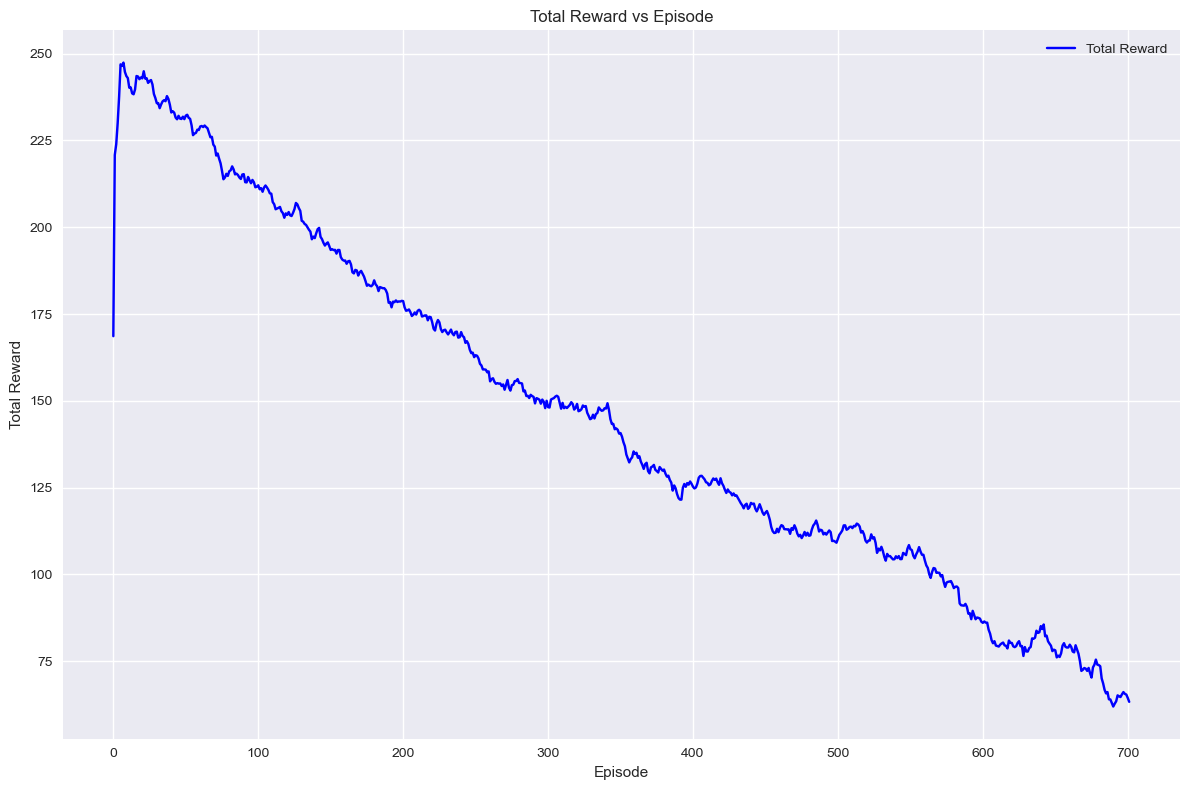

In [39]:
rewards_list = dqn_episode_info["episode_avg_rewards"]
# Plotting the rewards
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(rewards_list, label='Total Reward', color='blue')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward vs Episode')
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

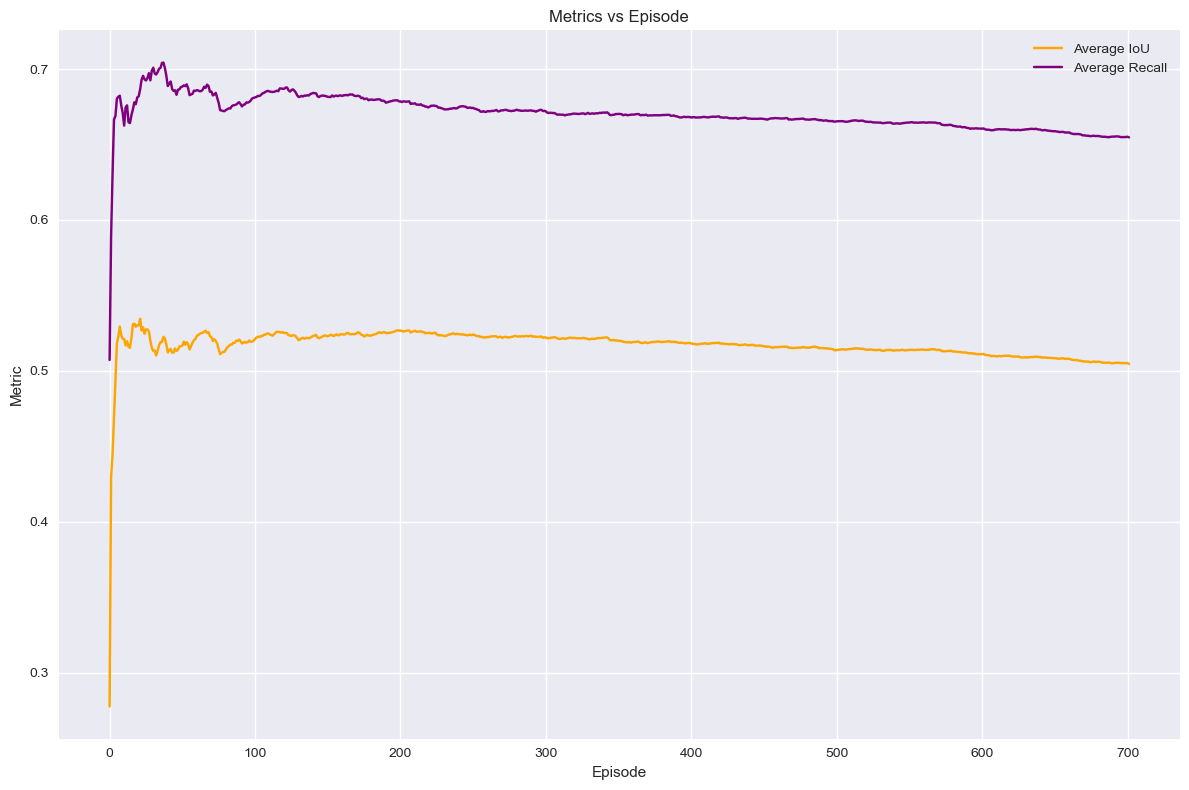

In [40]:
iou_list = dqn_episode_info["avg_iou"]
recall_list = dqn_episode_info["avg_recall"]

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(iou_list, label='Average IoU', color='orange')
plt.plot(recall_list, label='Average Recall', color='purple')
plt.xlabel('Episode')
plt.ylabel('Metric')
plt.title('Metrics vs Episode')
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

In [41]:
# Predicting the bounding box
env.reset()
# env.display(do_display=True, mode='image')
state = env.get_state()

total_reward = 0

terminated = False
truncated = False

while True:
    action = dqn_agent.select_action(state)
    next_state, _, terminated, truncated, info = env.step(action)
    env.decode_action(action)
    done = truncated or terminated

    state = next_state
    # env.display(do_display=True, mode='image')
    if done:
        break

print(f"Total Reward: {total_reward}, IoU: {info['iou']}, Recall: {info['recall']}, Steps: {env.step_count}")

Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Move up ↑
Action: Mo

In [42]:
# env.test()

In [43]:
dqn_agent.test(file_path=name)#, video_filename='test.mp4')

Video saved to: Normal DQN\output_video.mp4


In [44]:
env.classification_dictionary

{'label': ['theater_curtain', 'chime', 'chime', 'chime'],
 'confidence': [0.9999453, 0.7787824, 0.5745824, 0.7787824],
 'bbox': [[0, 371, 500, 375],
  [0, 0, 375, 4],
  [125, 0, 500, 4],
  [0, 0, 375, 4]],
 'color': [(255, 63, 0), (255, 48, 0), (0, 208, 255), (255, 37, 0)]}

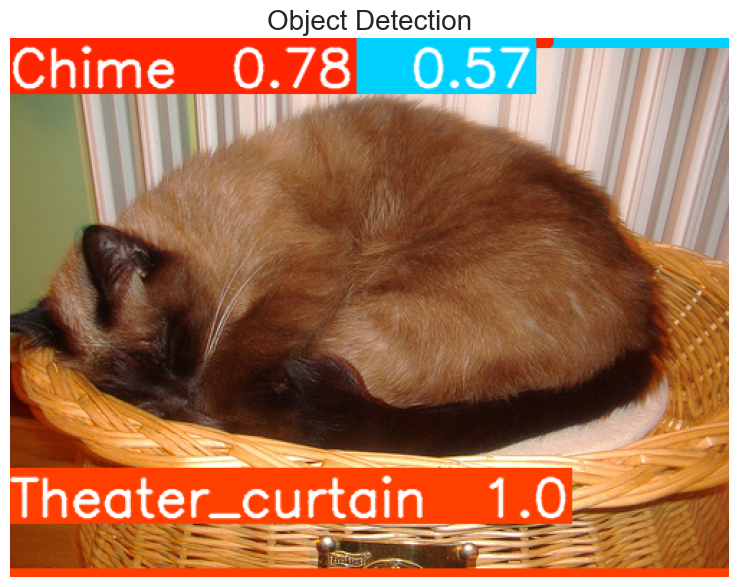

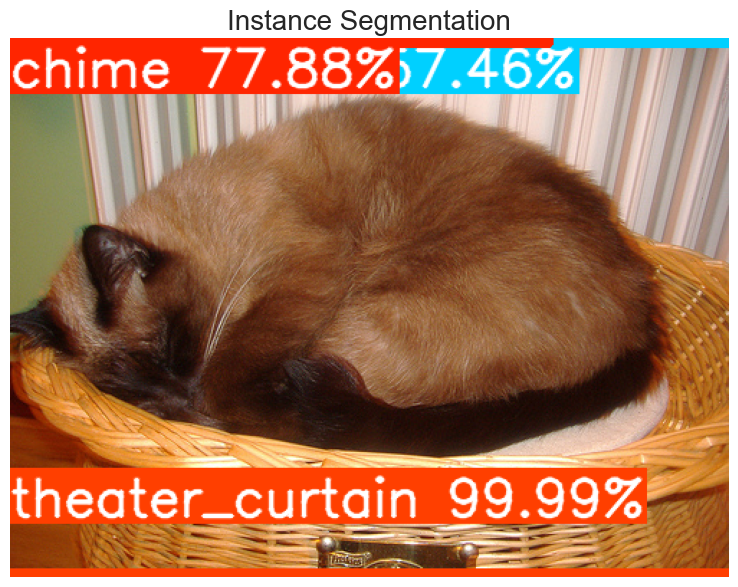

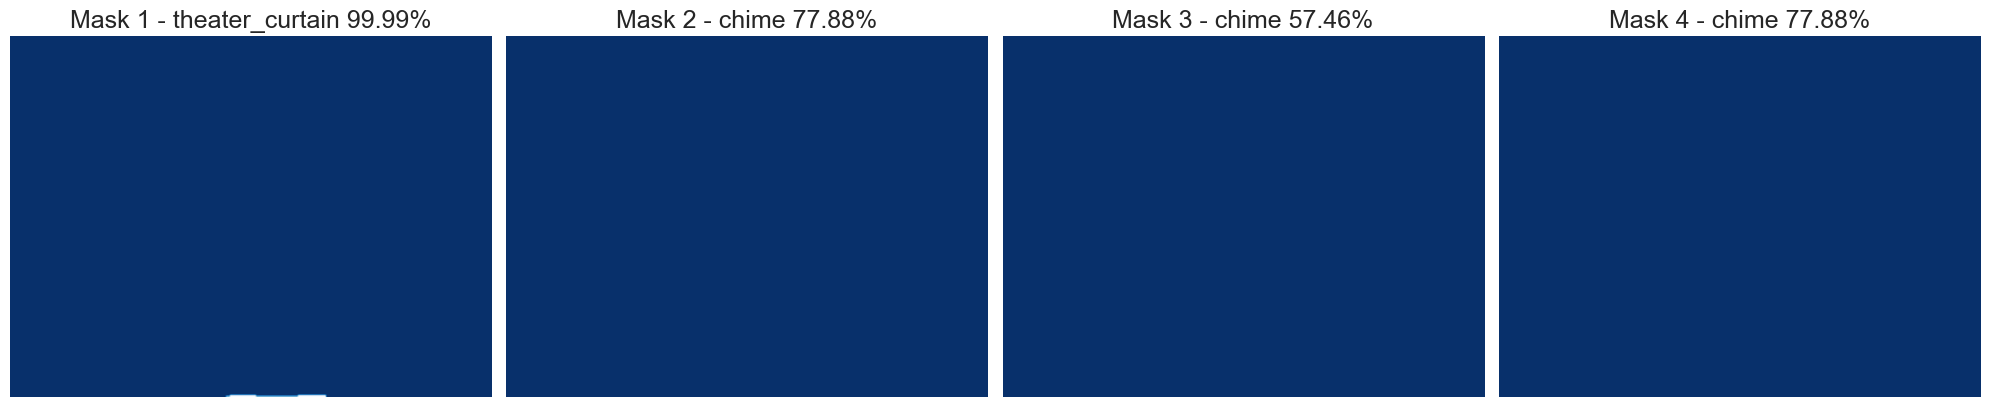

In [45]:
prediction = env.predict()
mask_dictionary = env.segment(do_display=True, display_mode='image')
mask_dictionary = env.segment(do_display=True)

Executing COCO

 Annotating image:  Mask Name


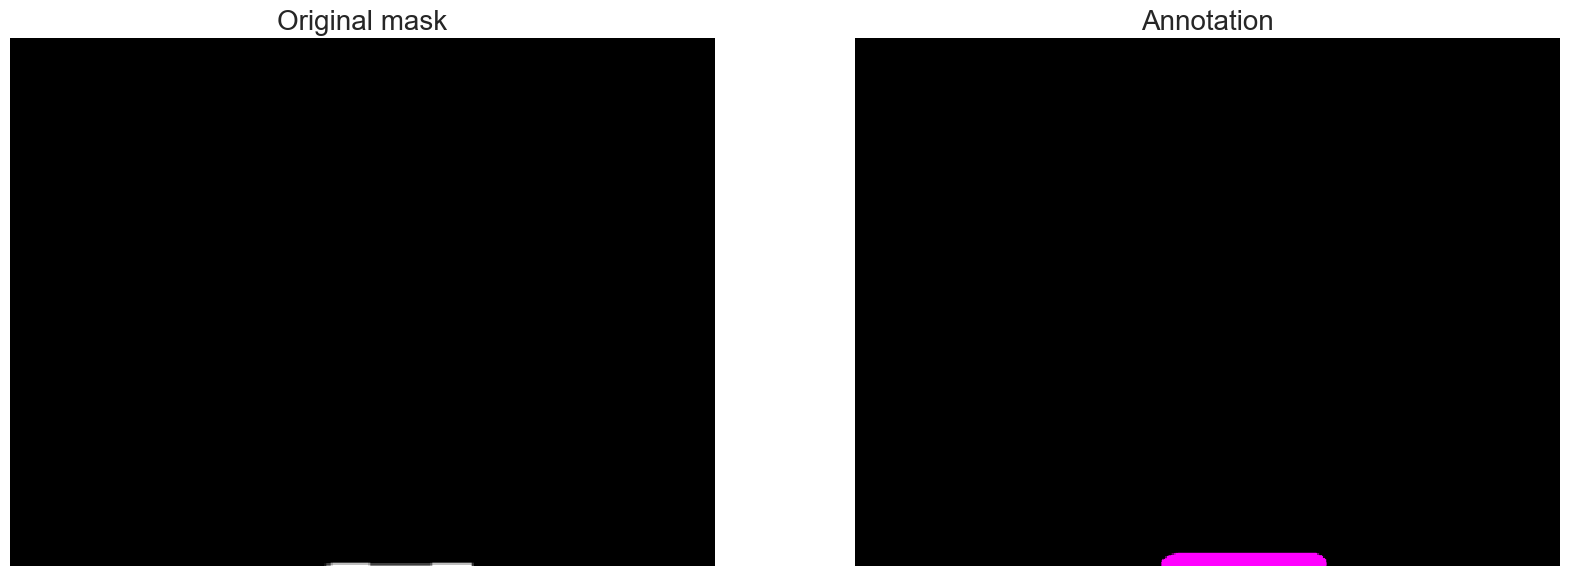

 Succesfully saved image:  Mask Name 


------------------------------------------------------------------------------------------------------------------------
Executing VGG

 Annotating image:  Mask Name


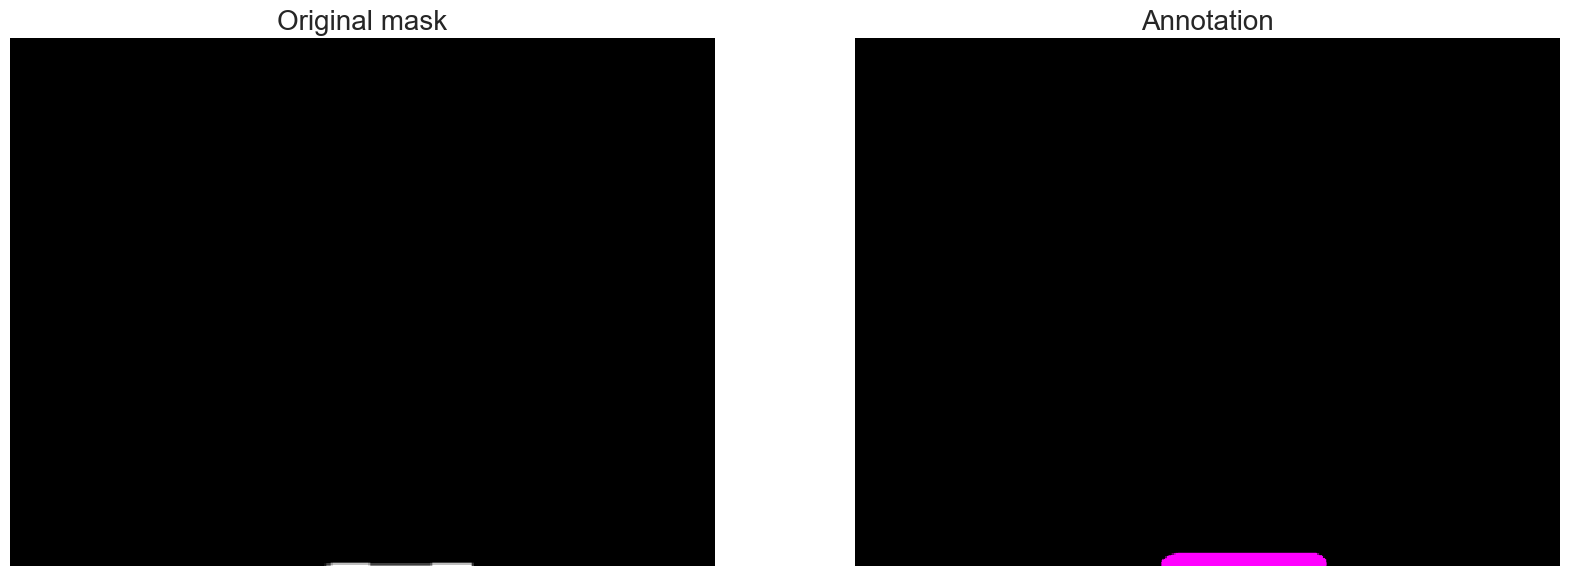

 Succesfully saved image:  Mask Name 


------------------------------------------------------------------------------------------------------------------------
Executing YOLO

 Annotating image:  Mask Name


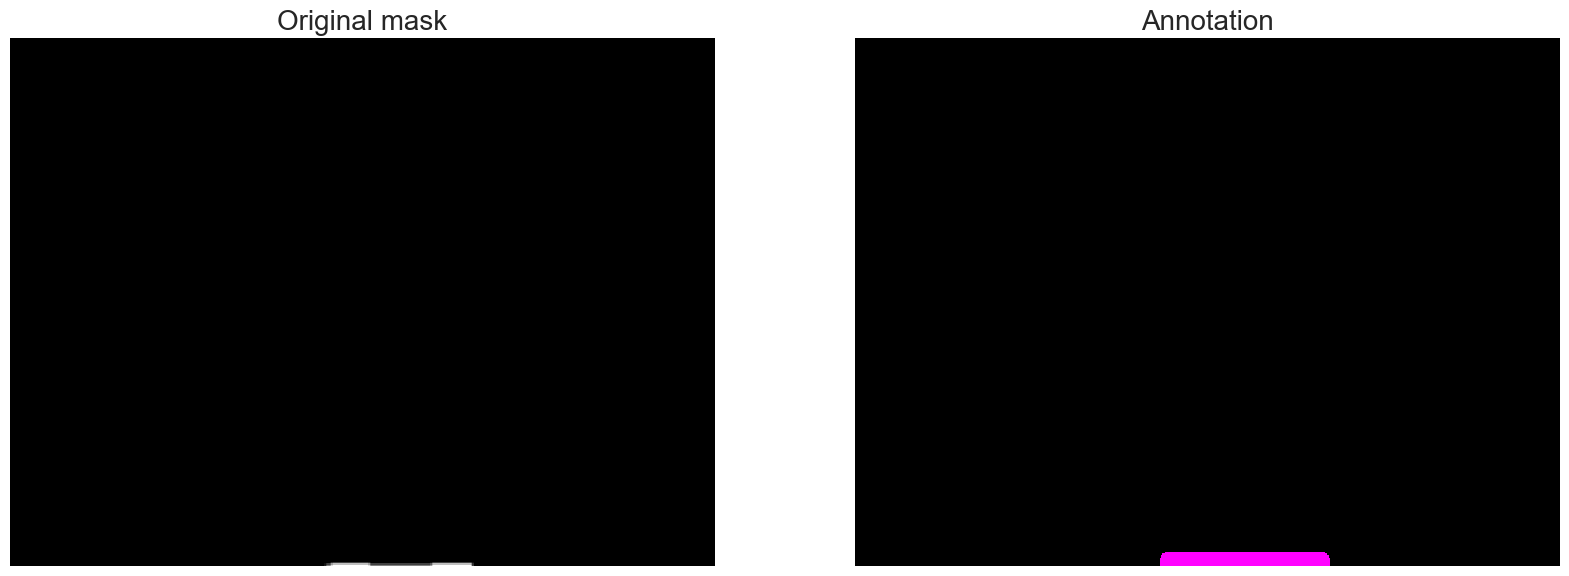

 Succesfully saved image:  Mask Name 


------------------------------------------------------------------------------------------------------------------------


In [46]:
# Applying Mask to Annotation
# Extracting the first mask
mask = mask_dictionary['masks'][0]
category = mask_dictionary['labels'][0]
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

print('\033[32m' + "Executing COCO" + '\033[0m')
env.annotate(mask, "Mask Id", "Mask Name" ,"Object Detection", "Annotations/COCO_annotations", do_display=True, annotation_format="coco", do_save=True, category=category)
print('\033[32m' + "Executing VGG" + '\033[0m')
env.annotate(mask, "Mask Id", "Mask Name" ,"Object Detection", "Annotations/VGG_annotations", do_display=True, annotation_format="vgg", do_save=True, category=category)
print('\033[32m' + "Executing YOLO" + '\033[0m')
env.annotate(mask, "Mask Id", "Mask Name" ,"Object Detection", "Annotations/YOLO_annotations", do_display=True, annotation_format="yolo", do_save=True, category=category)

USE IOU FOR CROPPPING EXPERIMENT IOU WITH THE GROUND TRUTH BOUNDING BOX VS IOU WITH SARA FROM GENERATED BOUNDING BOXES WITH COCO DATASET

In [47]:
# # Predicting the bounding box with a different network
# env.reset(classifier=MobileNetV2(), target_size=MOBILENETV2_TARGET_SIZE)
# env.display(do_display=True, mode='image')
# state = env.get_state()

# total_reward = 0

# terminated = False
# truncated = False

# while True:
#     action = dqn_agent.select_action(state)
#     next_state, _, terminated, truncated, info = env.step(action)
#     env.decode_action(action)
#     done = truncated or terminated

#     state = next_state

#     env.display(do_display=True, mode='image')
#     if done:
#         break

# print(f"Total Reward: {total_reward}, IoU: {info['iou']}, Recall: {info['recall']}, Steps: {env.step_count}")
# prediction = env.predict()

In [48]:
env.close()

#### RLLIB - Forget for now

In [49]:
# #conda install conda-forge::ray-rllib
# #conda install conda-forge::ray-tune
# from ray.rllib.algorithms.ppo import PPOConfig
# from ray.tune.logger import pretty_print
# from ray.tune.registry import register_env

# # Creating the environment configuration
# env_config = {
#     "image": img,
#     "original_image": img,
#     "target_bbox": target_bbox,
#     "render_mode": "human"
# }

# # Register the environment to ray.tune
# register_env("DetectionEnv-v0", lambda config: DetectionEnv(**config))

# algo = (
#     PPOConfig()
#     .rollouts(num_rollout_workers=1)
#     .resources(num_gpus=0)
#     .environment(env="DetectionEnv-v0", env_config=env_config, disable_env_checking=True)  # Pass the env_config here
#     .build()
# )

# for i in range(10):
#     result = algo.train()
#     print(pretty_print(result))

#     if i % 5 == 0:
#         checkpoint_dir = algo.save().checkpoint.value
#         print(f"Checkpoint saved in directory {checkpoint_dir}")



##### Loading from dataset

Using downloaded and verified file: PascalVOC2007_2012Dataset\VOCtrainval_06-Nov-2007.tar
Extracting PascalVOC2007_2012Dataset\VOCtrainval_06-Nov-2007.tar to PascalVOC2007_2012Dataset
Using downloaded and verified file: PascalVOC2007_2012Dataset\VOCtrainval_11-May-2012.tar
Extracting PascalVOC2007_2012Dataset\VOCtrainval_11-May-2012.tar to PascalVOC2007_2012Dataset
Dataset loaded successfully.
Total number of classes in the dataset: 20
Total number of images in the dataset: 12752
Current Class: cat


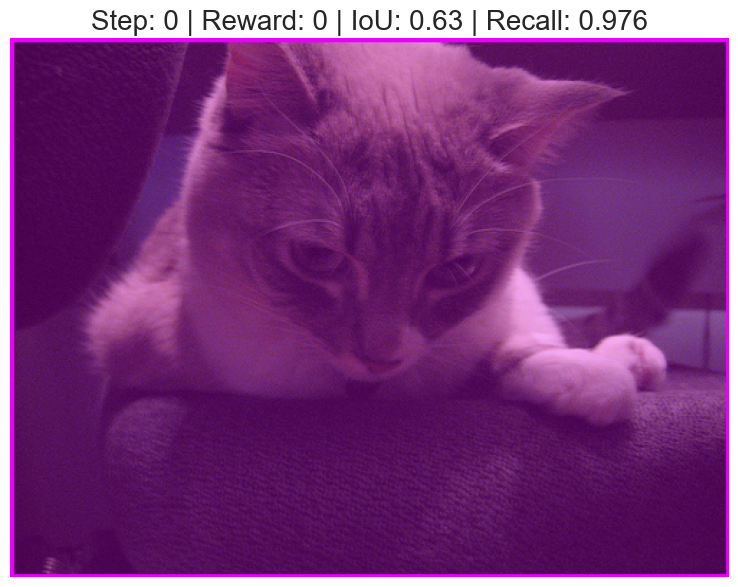

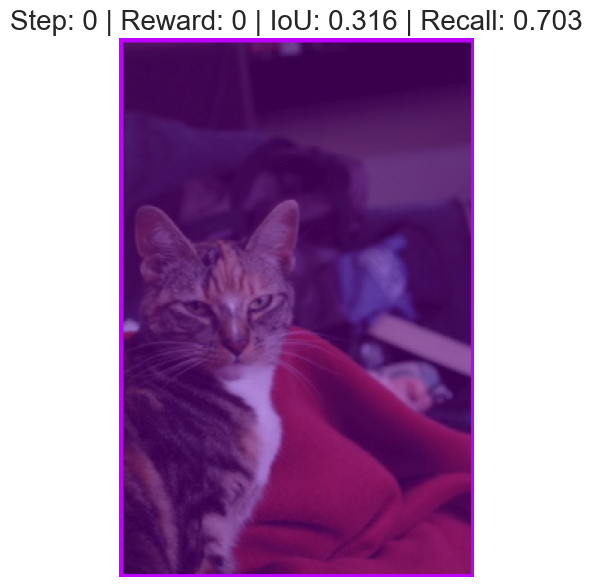

In [50]:
env_config = {'dataset': 'PascalVOC2007_2012Dataset', 'dataset_image_set': 'val', 'year': '2007+2012'}
env2 = gym.make('DetectionEnv-v0', env_config=env_config)
_ = env2.display(do_display=True, mode='image')
# _ = env2.reset()
# _ = env2.display(do_display=True, mode='image')
_ = env2.reset()
_ = env2.display(do_display=True, mode='image')
_ = env2.render()

In [51]:
env2.current_gt_bboxes

[[1, 107, 123, 360]]

In [52]:
env2.target_bbox

[1, 107, 123, 360]

In [53]:
# env2.test()
# env2.save_evaluation_results("results")